# 0729 신경망
## 신경망 접하기- 흑백 손글씨 숫자 이미지 10개의 범주로 분류

In [25]:
import keras

In [2]:
# 케라스에서 MNIST 데이터셋 적재하기
from keras.datasets import mnist 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images와 train_labels = 모델이 학습할 훈련 세트

test_images와 test_labels = 모델 테스트 할 때 쓸 테스트 세트

In [3]:
#훈련 데이터 살펴보기
train_images.shape

(60000, 28, 28)

In [4]:
len(train_images)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
#테스트 데이터 살펴보기
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

훈련 데이터를 네트워크에 주입하여 학습시키고 test_images에 대한 예측을 네트워크에 요청한 뒤, 이 예측이 test_labels와 맞는지 확인한다

In [9]:
#신경망 구조
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape= (28*28,)))
network.add(layers.Dense(10, activation='softmax'))

대부분의 딥러닝은 간단한 층을 연결하여 구성되어 있고, 점진적으로 데이터를 정제하는 형태를 띠고 있다. 딥러닝 모델은 데이터 정제 필터가 연속되어 있는 여과기와 같다.

신경망이 훈련 준비를 마치려면 컴파일 단계가 필요한데, 여기 포함될 세 가지 요소로 손실 함수loss, 옵티마이저optimizer, 모니터링 지표metrics가 있다.

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
'''categorical_crossentropy는 손실 함수. 
훈련하는 동안 미니 배치 SGD를 통해 최소화된다.'''

[0,255] 사이의 값인 unit8타입의 배열로 저장되어 있는 훈련 이미지를 0과 1 사이의 값을 가지는 float32 타입의 배열로 바꾼다.

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [12]:
#레이블을 범주형으로 인코딩한다.
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

케라스에서는 fit 메서드를 호출하여 훈련 데이터에 모델을 학습시킨다.

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
#epochs= 전체 훈련 데이터에 수행되는 각 반복
''' 네트워크가 128개 샘플식 미니 배치로 훈련 데이터를 5번 반복함.
각 반복마다 신경망이 배치에서 손실에 대한 가중치의 그래디언트를 계산하고 거기 맞춰 가중치를 업데이트함.
5번의 에포크동안 2345번의 그래디언트 업데이트...

Epoch 1/5
469/469 [==============================] - 4s 5ms/step - loss: 0.2567 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1032 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0681 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0503 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0379 - accuracy: 0.9885


# 텐서
최근의 모든 머신 러닝 시스템을 일반적으로 텐서를 기본 데이터 구조로 사용한다. 텐서는 머신 러닝의 기본 구성 요소이다.
## 텐서란? 
데이터를 위한 컨테이너, 거의 항상 수치형 데이터를 다루므로 숫자를 위한 컨테이너이다. 행렬은 2D 텐서이며, 하나의 숫자만 담고 있는 스칼라는 0차원 덴서라고 할 수 있다.

In [15]:
#스칼라
import numpy as np
x= np.array(12)
x.ndim #몇차원 텐서인지 알 수 있는 메서드이다.

0

In [16]:
#벡터
#숫자의 배열, 하나의 축을 가진다
x = np.array([12,3,6,14,7])
x.ndim

1

벡터와 텐서 혼동하면 안됨: [12,3,6,14,7]의 경우 5차원 벡터지만 5D 텐서(랭크5 텐서)라고는 할 수 없다. 

위의 5D 벡터는 하나의 축을 따라 5개의 차원을 가진 것.

In [17]:
#행렬(백터의 배열, 2D 텐서)
x= np.array([[5, 78, 2, 34, 0], 
            [6, 79, 3, 35, 1], 
            [7, 80, 4, 36, 2]])
x.ndim
#x의 첫번째행=[5,78,2,34,0], x의 첫번째열=[5,6,7]

2

In [18]:
#3D 텐서
x = np.array([[[5, 78, 2, 34, 0], 
                   [6, 79, 3, 35, 1], 
                   [7, 80, 4, 36, 2]], 
                  [[5, 78, 2, 34, 0], 
                   [6, 79, 3, 35, 1], 
                   [7, 80, 4, 36, 2]], 
                  [[5, 78, 2, 34, 0], 
                   [6, 79, 3, 35, 1], 
                   [7, 80, 4, 36, 2]]]) 
x.ndim

3

3D 텐서들을 하나의 배열로 합치면 4D 텐서가 된다. 딥러닝에서는 보통 0D에서 4D까지의 텐서를 다루며, 동영상 데이터를 다룰 때 5D까지 가기도 한다.

## 텐서는 3개의 핵심 속성으로 정의된다.
* 축의 개수(랭크)
* 크기(축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플. 위의 3D 텐서의 크기는 (3,3,5)
* 데이터 타입(텐서에 포함된 데이터의 타입. NumPy에서는 Dtype에 저장된다)

In [19]:
#MNIST 데이터셋의 축의 갯수는 3개
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim)

3


In [20]:
#배열의 크기
print(train_images.shape)

(60000, 28, 28)


In [21]:
#데이터 타입=8비트 정수
print(train_images.dtype)

uint8


이 배열은 28*28 크기의 8비트 정수 행렬 6만개가 있는 배열(3D 텐서)이다. 각 행렬은 하나의 흑백 이미지고, 행렬의 각 원소는 0에서 255 사이의 값을 가진다.

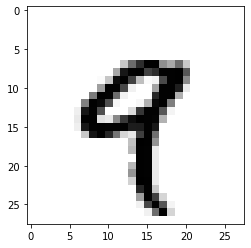

In [22]:
#5번째 이미지 출력
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [23]:
#넘파이로 텐서 조작하기
my_slice = train_images[10:100] 
#아래 두 방법으로 표기해도 동일 결과 출력
#my_slice = train_images[10:100, :, :]
#my_slice = train_images[10:100, 0:28, 0:28]
#11번째에서 101번째까지(101번쨰는 포함X) 선택하여 (90,28,28) 크기의 배열 만들기
print(my_slice.shape)

(90, 28, 28)


딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는다. 대신 데이터를 작은 배치로 나눈다.

* 첫 번째 배치 batch = train_images[:128]
* 두 번째 배치 batch = train_images[128:256]
* n번째 배치 batch = train_images[128*n:128*(n+1)]

이런 배치 데이터를 다룰 때는 첫 번째 축을 배치 축 또는 배치 차원이라고 부른다.

## 텐서의 몇 가지 예

* 벡터 데이터- (samples, features) 크기의 2D 텐서
* 시계열 데이터 또는 시퀀스 데이터:(samples, timesteps, features) 크기의 3D 텐서
* 이미지: (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
* 동영상: (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서

벡터 데이터- 대부분의 경우. 첫 번째 축: 샘플 축, 두 번째 축: 특성 축

시계열 데이터- 데이터에서 시간이나 연속된 순서가 중요할 때 시간 축을 포함하여 저장. 관례적으로 시간 축은 항상 두 번째(인덱스1) 축이다.

이미지 데이터- 높이, 너비, 컬러채널의 3차원으로 이루어진 이미지 샘플 갯수. 채널 마지막 방식과 채널 우선 방식 두 가지가 있음

비디오 데이터- 프레임이 (height, width, color_depth)의 3D 텐서로 저장될 수 있기 때문에 프레임의 연속은 (frames, height, width, color_depth)의 4D 텐서로 저장될 수 있음. 여러 비디오의 배치일 경우 5D 텐서로 저장될 수 있다.

# 텐서 연산

심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하는 몇 종류의 텐서 연산tensor operation으로 나타낼 수 있다. 텐서 덧셈이나 텐서 곱셈 등이 있다.

In [26]:
#케라스 층 생성
keras.layers.Dense(512, activation='relu')

이 층은 2D 텐서를 입력으로 받고 입력 텐서의 새로운 표현인 또 다른 2D 텐서를 반환하는 함수처럼 해석할 수 있다.
구체적으로 보면 이 함수는 다음과 같다.

output = relu(dot(w,input)+b)

텐서 연산 3개
* 입력 텐서와 텐서 W 사이의 점곱(dot) 
* 점곱의 결과인 2D 텐서와 벡터 b 사이의 덧셈(+)
* relu(렐루) 연산 (max(x,0))

렐루 함수와 덧셈은 원소별 연산으로, 텐서에 있는 각 원소에 독립적으로 적용된다. 파이썬으로 단순한 원소별 연산을 구현한다면 for 반복문을 사용할 것이다.

In [27]:
#원소별 연산
def naive_relu(x):
    assert len(x.shape) == 2    # x=2D 넘파이 배열만
    x = x.copy()     # 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

'''덧셈, 곱셈, 뺄셈도 동일하다.
def naive_add(x, y):
    assert len(x.shape) == 2  # x와 y는 2D 넘파이 배열
    assert x.shape == y.shape

    x = x.copy()    # 입력 텐서 자체를 바꾸지 않도록 복사
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                x[i, j] += y[i, j]
    return x'''
#물론 넘파이 쓰면 저런 연산들을 바로 처리할 수 있음.
#원소별 덧셈 z= x+y
#z=원소별 렐루 np.maximum(z, 0.)

In [28]:
#브로드캐스팅
'''크기가 다른 두 텐서가 더해질 때-
작은 텐서가 큰 텐서의 크기에 맞추어 브로드캐스팅된다.'''
import numpy as np
x = np.random.random((64, 3, 32, 10)) 
# x는 (64, 3, 32, 10) 크기의 랜덤 텐서
y = np.random.random((32, 10))        
# y는 (32, 10) 크기의 랜덤 텐서
z = np.maximum(x, y)
# 출력 z 크기는 x와 동일하게 (64, 3, 32, 10)

In [31]:
#텐서 점곱(내적)
'''텐서 곱셈이라고도 불림.'''
import numpy as np
#z = np.dot(x, y)

#z = x · y

#점곱 연산이란?
def naive_vector_dot(x, y):
    assert len(x.shape) == 1  # x와 y는 넘파이 벡터
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]

    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z
'''두 벡터의 점곱은 스칼라가 되므로, 원소 개수가 같은 
벡터끼리 점곱이 가능함'''

def naive_matrix_dot(x, y):
    assert len(x.shape) == 2   # x와 y는 넘파이 행렬입니다.
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]  # x의 두 번째 차원이 y의 첫 번째 차원과 같아야 합니다!

    z = np.zeros((x.shape[0], y.shape[1]))  # 이 연산은 0이 채워진 특정 크기의 벡터를 만듭니다.
    for i in range(x.shape[0]):     # x의 행을 반복합니다.
        for j in range(y.shape[1]): # y의 열을 반복합니다.
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [32]:
#텐서 크기 변환
'''텐서의 크기를 변환한다는 것은 특정 크기에 맞게 열과
행을 재배열한다는 뜻이다. 
당연히 크기가 변환된 텐서는 원래 텐서랑 원소 개수가 동일함!
'''
x = np.array([[0., 1.],
                  [2., 3.],
                  [4., 5.]])
print(x.shape)

(3, 2)


In [34]:
#2D 텐서의 크기를 (6,1)로 변환
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [35]:
#2D 텐서의 크기를 (2,3)로 변환
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [36]:
#전치행렬 크기변환
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


> 신경망은 전체적으로 텐서 연산의 연결로 구성된 것이고, 모든 텐서 연산은 입력 데이터의 기하학적 변환임을 배웠습니다. 단순한 단계들이 길게 이어져 구현된 신경망을 고차원 공간에서 매우 복잡한 기하학적 변환을 하는 것으로 해석할 수 있습니다.

> 3D라면 다음 비유가 이해하는 데 도움이 될 것입니다. 하나는 빨간색이고 다른 하나는 파란색인 2개의 색종이가 있다고 가정합시다. 두 장을 겹친 다음 뭉쳐서 작은 공으로 만듭니다. 이 종이 공이 입력 데이터고 색종이는 분류 문제의 데이터 클래스입니다. 신경망(또는 다른 머신 러닝 알고리즘)이 해야 할 일은 종이 공을 펼쳐서 두 클래스가 다시 깔끔하게 분리되는 변환을 찾는 것입니다. 손가락으로 종이 공을 조금씩 펼치는 것처럼 딥러닝을 사용하여 3D 공간에서 간단한 변환들을 연결해서 이를 구현합니다.
종이 공을 펼치는 것이 머신 러닝이 하는 일입니다. 복잡하고 심하게 꼬여 있는 데이터의 매니폴드에 대한 깔끔한 표현을 찾는 일입니다. 이쯤이면 왜 딥러닝이 이런 작업에 뛰어난지 알았을 것입니다. 기초적인 연산을 길게 연결하여 복잡한 기하학적 변환을 조금씩 분해하는 방식이 마치 사람이 종이 공을 펼치기 위한 전략과 매우 흡사하기 때문입니다.

[출처](https://tensorflow.blog/%ec%bc%80%eb%9d%bc%ec%8a%a4-%eb%94%a5%eb%9f%ac%eb%8b%9d/2-3-%ec%8b%a0%ea%b2%bd%eb%a7%9d%ec%9d%98-%ed%86%b1%eb%8b%88%eb%b0%94%ed%80%b4-%ed%85%90%ec%84%9c-%ec%97%b0%ec%82%b0/)

# 신경망의 엔진

위의 예제에 있는 각 층은 입력 데이터를 이렇게 변환한다.

output = relu(dot(W, input) * b)

> 이 식에서 텐서 W와 b는 가중치 또는 훈련되는 파라미터라고 부른다. 
이런 가중치에는 훈련 데이터를 신경망에 노출시켜서 학습된 정보가 담겨 있다.
초기에는 가중치 행렬이 난수(무작위 초기화 단계)지만
피드백 신호에 기초하여 가중치가 점진적으로 조정됨. 이것을 훈련이라고 하며
훈련이야말로 머신 러닝 학습의 핵심!!!

훈련은 훈련 반복 루프 안에서 일어난다.
1. 훈련 샘플 x와 이에 상응하는 타깃 y의 배치 추출
2. x 사용해서 신경망 실행하고 예측 y_pred 구하기
3. 예측이랑 실제 y의 차이를 측정(손실 계산)
4. 배치에 대한 손실이 감소되도록 신경망의 모든 가중치 업뎃!!

이순서임
이러다보면 손실 작아짐

## 근데 이 가중치 어디를 얼마나 업뎃해야 할지 어케 알음?

간단한 방법은 가중치를 하나씩 늘였다 줄였다 하는거지만
어느세월에 하겠음. . .
신경망에 사용된 모든 연산이 미분 가능하다는 점을 사용해서
가중치에 대한 손실의 미분 결과(이하 그래디언트)를 계산하는게 훨씬 낫다!!
그래디언트의 반대방향으로 가중치 옮기면 손실 작아질것

### 미분이 가능하다? > 변화율을 유도할 수 있다.
손실 함수 f(x)=y의 경우 연속함수이므로 x를 조금 바꾸면 y가 조금 바뀔 것이다.
여기서 x를 작은 값 epsilon_x만큼 증가시킨다 치면 y는 epsilon_y만큼 바뀐다고 할 수 있다.

> f(x + epsilon_x) = y + epsilon_y

또 이 함수가 매끈매끈해서 epsilon_x가 충분히 작으면 어떤 포인트 p에서 기울기 a의 선형 함수로 f를 근사할 수 있 어쩌고 

대충 미분해서 기울기 a 구하고 a가 변화율이니 여기에 맞춰서 이동하면 f(x) 감소 가능하단소리

### 그래디언트는 텐서 연산의 변화율이다.
입력 벡터 x, 행렬 W, 타깃 y와 손실 함수 loss가 있다고 치면
W를 사용하여 예측과 손실을 계산할 수 있다.

> y_pred = dot(W, x)
loss_value = loss(y_pred, y)

입력데이터 x와 y가 고정되어 있다면 이 함수는 W를 손실 값에 매핑하는 함수로 볼 수 있다.
loss_value = f(w)
대충 위에서 한 말 보면 생각나겠지만 이것도 변화율을 구해서 그 반대 방향으로 W를 움직이면 f(w), loss value를 줄일 수 있단 말임

> W1 = W0 - step * gradient(f)(W0)(step는 스케일을 조정하는 값)

이렇게 업뎃됨

함수의 최솟값은 변화율이 0인 지점이므로 
## 우리가 할 일: 변화율이 0이 되는 지점을 모두 찾고 이 중에서 어디가 제일 함숫값이 작게 나오는지 확인하기

위의 1. 2. 3. 4. 써놓은 방법은 가중치 개수가 두세개면 모르겠는데
실제 신경망에선 파라미터가 최소 수천 개는 된다...

언제 다하고앉아있음?

그 대신 이렇게 하면됨
1. 훈련 샘플 x와 이에 상응하는 타깃 y의 배치 추출
2. x 사용해서 신경망 실행하고 예측 y_pred 구하기
3. 예측이랑 실제 y의 차이를 측정(손실 계산)
4. 신경망의 파라미터(weight)에 대한 손실 함수의 그래디언트 계산(역방향 패스)
5. 그래디언트의 반대 방향으로 파라미터를 조금 이동시키기

이걸 미니 배치 확률적 경사 하강법(미니 배치 SGD)이라고 부른다.
확률적이란 단어는 각 배치 데이터가 무작위로 선택된다는 의미.

이터레이션마다 하나의 샘플과 하나의 타깃을 뽑으면 진정한 SGD이고 가용한 모든 데이터를 사용하여 반복할 시 배치 SGD라고 부른다. 이건 더 정확하지만 비용이 많이 듦

적절한 크기의 미니 배치를 쓰는 것이 효율적 절충안이다.

업데이트할 다음 가중치를 계산할 때 그래디언트 값만 보지 않고 이전에 업데이트된 가중치를 여러 다른 방식으로 고려하는 SGD 변종이 여럿 있다. 모멘텀을 사용한 SGD,Adagrad,RMSProp 등 이런 변종들을 모두 옵티마이저라고 부른다. 

특히 모멘텀 개념은 아주 중요하다. 모멘텀은 SGD에 있는 2개의 문제점인 수렴 속도와 지역 최솟값을 해결한다.
(우리는 일정 부분에서만 최소의 값을 가지는 지역 최솟값이 아니라, 전체 부분에서 가장 작은 값인 전역 최솟값을 찾아야 하기 때문에)

